<a href="https://colab.research.google.com/github/Cynthia3992/DeepLearning_Columbia/blob/master/assignment2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# The code in this notebook should work identically between TF v1 and v2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

from tensorflow.keras import applications
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
# Accuracy and Validation Plot function

def plt_acc(history, pfx = ''):
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(1, EPOCHS+1)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title(pfx + ' Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title(pfx + ' Training and Validation Loss')
  plt.show()

## Part 1

1) Download the mini-flowers dataset. This contains 1,500 images of five different types of flowers. Modify one of the above notebooks to classify these images using transfer learning. How accurate of a model can you train? 

2) Next, run experiments using at least two pretrained convolutional bases (​applications​), and compare your results. Include a short, informal write-up (using bullet points is fine). What differences do you see, and why? Read the associated papers to learn more about the networks you’re using, linked from the API doc.


In [16]:
## load data fom google drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
base_dir = '/content/drive/My Drive/mini_flowers'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
train_daisy_dir = os.path.join(train_dir, 'daisy')
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_roses_dir = os.path.join(train_dir, 'roses')
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')
train_tulips_dir = os.path.join(train_dir, 'tulips')

val_daisy_dir = os.path.join(val_dir, 'daisy')
val_dandelion_dir = os.path.join(val_dir, 'dandelion')
val_roses_dir = os.path.join(val_dir, 'roses')
val_sunflowers_dir = os.path.join(val_dir, 'sunflowers')
val_tulips_dir = os.path.join(val_dir, 'tulips')

In [19]:
print(len(os.listdir(val_daisy_dir)))
print(len(os.listdir(val_dandelion_dir))) 
print(len(os.listdir(val_roses_dir))) 
print(len(os.listdir(val_sunflowers_dir)))
print(len(os.listdir(val_tulips_dir)))

100
100
100
100
100


In [0]:
# Images will be resized to(TARGET_SHAPE, TARGET_SHAPE) as they're read off disk.
TARGET_SHAPE = 150 
BATCH_SIZE = 32

In [21]:
CLASS_MODE = 'categorical'
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode=CLASS_MODE)

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=val_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode=CLASS_MODE)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [0]:
sample_training_images, sample_training_labels = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(12,12))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.grid(False)
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

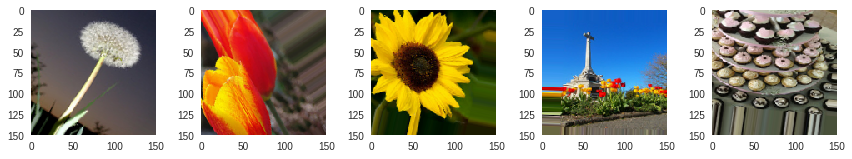

In [24]:
plotImages(sample_training_images[:5])

## Build and Train the model

In [0]:
EPOCHS = 50

In [0]:
conv_base = applications.VGG16(weights='imagenet',include_top=False, 
                               input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss= 'categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

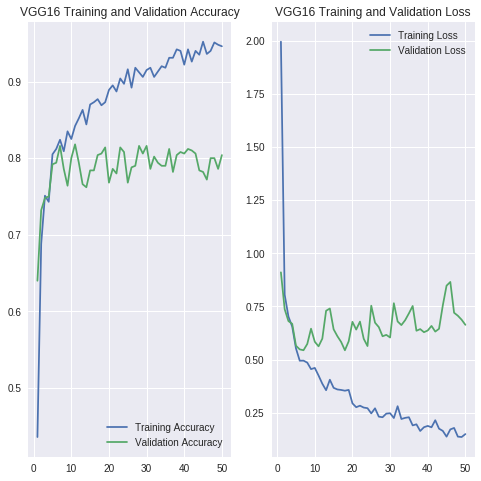

In [29]:
 plt_acc(history, pfx = 'VGG16')

In [0]:
conv_base = applications.ResNet50(weights='imagenet',include_top=False, 
                                  input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

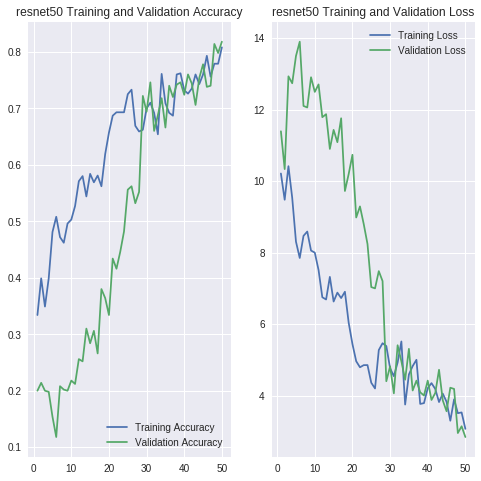

In [35]:
 plt_acc(history, pfx = 'resnet50')

In [0]:
conv_base = applications.InceptionV3(weights='imagenet',include_top=False,
                                     input_shape=(150, 150, 3))

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

conv_base.trainable = False

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])


history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(1000.0 / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(500.0 / float(BATCH_SIZE)))
)

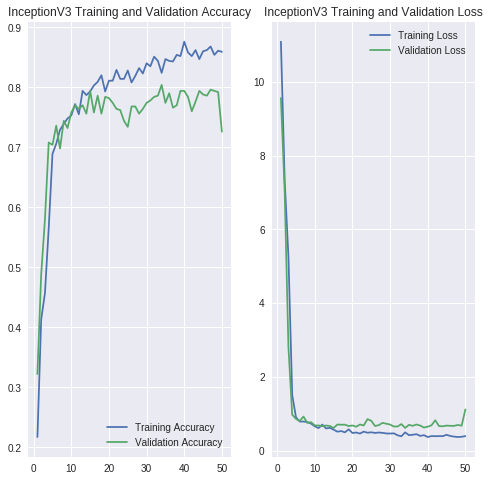

In [33]:
 plt_acc(history, pfx = 'InceptionV3')

Difference between ResNet50 and InceptionV3

* Training speeds are roughly the same.
  * InceptionV3 will probably be faster given its design if we were using a larger data set. 
  * InceptionV3 uses higher dimensional represetation and spatial aggregation for better training and learning speeds. 
* InceptionV3 converges faster and has less volatility in the accuracy between each epoch. 
  * This is likey due to the use of auxilary classifiers in Inception V3. Auxillary classifiers allow for faster convergence and more stable learning. 
* Accuracy of InceptionV3 is higher
* There is a bigger difference in the training set and validation set accuracy of IncpetionV3 than for RetNet50
  * this is likely because InceptionV3 is overfitting more than ResNet50, there for the validation accuracay does not improve with each iteration. 
  


# Part 2 
1. Collect a dataset of at least three landmarks. Your dataset should include at least 100 images of each in train, 50 in validation, and 25 in test (using more images is fine). You can randomly shuffle your dataset to create these splits.

2. Write a model to classify your dataset using transfer learning. Run an experiment and report your results. What do you find?
   
3. Next, how small of a model (in terms of the number of parameters) can you write to classify these images reasonably well? Explore the available

In [0]:
base_dir = 'content/drive/My Drive/hw2_data/images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validate')

In [0]:
train_eye_dir = os.path.join(train_dir, 'eye')
train_lion_dir = os.path.join(train_dir, 'lion')
train_thinker_dir = os.path.join(train_dir, 'thinker')

val_eye_dir = os.path.join(val_dir, 'eye')
val_lion_dir = os.path.join(val_dir, 'lion')
val_thinker_dir = os.path.join(val_dir, 'thinker')

In [40]:
CLASS_MODE = 'categorical'
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=train_dir, 
    shuffle=True, 
    target_size=(TARGET_SHAPE,TARGET_SHAPE),
    class_mode=CLASS_MODE)

# Validation data should not be augmented!
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size=BATCH_SIZE, 
    directory=val_dir, 
    target_size=(TARGET_SHAPE, TARGET_SHAPE),
    class_mode=CLASS_MODE)


FileNotFoundError: ignored